Regression, classification and clustering machine learning algorithms were applied to a single dataset.

* In the regression problem, the income of the person is estimated.

* In the classification problem, the education level of the person was estimated.

* In the clustering problem, segmentation of customers was made.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/Final_Project/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

Mounted at /gdrive
/gdrive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1.Data

In [2]:
train_set = pd.read_csv(root+"marketing_campaign2.csv",delimiter=";")
train_set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13.06.2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10.06.2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25.01.2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24.01.2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Some columns were separated to be used in clustering.

In [3]:
for_product_clustering = train_set[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].copy()

Useless data was dropped.

In [4]:
train_set.drop(["ID", "Dt_Customer"], axis=1, inplace=True)

In [5]:
train_set.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [7]:
train_set.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
numerical_columns = ["Year_Birth", "Income", "Recency", "MntWines", "MntFruits",
                     "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
                     "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
                     "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
categorical_columns = ["Education", "Marital_Status", "Kidhome", "Teenhome",
                       "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
                       "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"]

# 2.Data Cleaning

Those with number of unique = 1 in the columns in the data set are dropped from the data set.

In [9]:
train_set = train_set.drop(train_set.loc[:,train_set.nunique()==1],axis=1)

## 2.1 Missing Values

In [10]:
train_set.isnull().sum()*100/train_set.shape[0]

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

The missing data in the Income column was filled with the median value.

In [11]:
train_set["Income"] = train_set["Income"].replace(np.nan, train_set.median()["Income"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
for i in numerical_columns:
    print("problematic values for column {} : ".format(i))
    hatali_degerler = []
    for deger in train_set[i]:
        try:
            float(deger)
        except:
            hatali_degerler.append(deger)
    print(set(hatali_degerler))

problematic values for column Year_Birth : 
set()
problematic values for column Income : 
set()
problematic values for column Recency : 
set()
problematic values for column MntWines : 
set()
problematic values for column MntFruits : 
set()
problematic values for column MntMeatProducts : 
set()
problematic values for column MntFishProducts : 
set()
problematic values for column MntSweetProducts : 
set()
problematic values for column MntGoldProds : 
set()
problematic values for column NumDealsPurchases : 
set()
problematic values for column NumWebPurchases : 
set()
problematic values for column NumCatalogPurchases : 
set()
problematic values for column NumStorePurchases : 
set()
problematic values for column NumWebVisitsMonth : 
set()


## 2.2 Outlier

### 2.2.1 Outlier(Boxplot)

Looking at the box plots below, it appears that there is 1 outlier in the Income value.

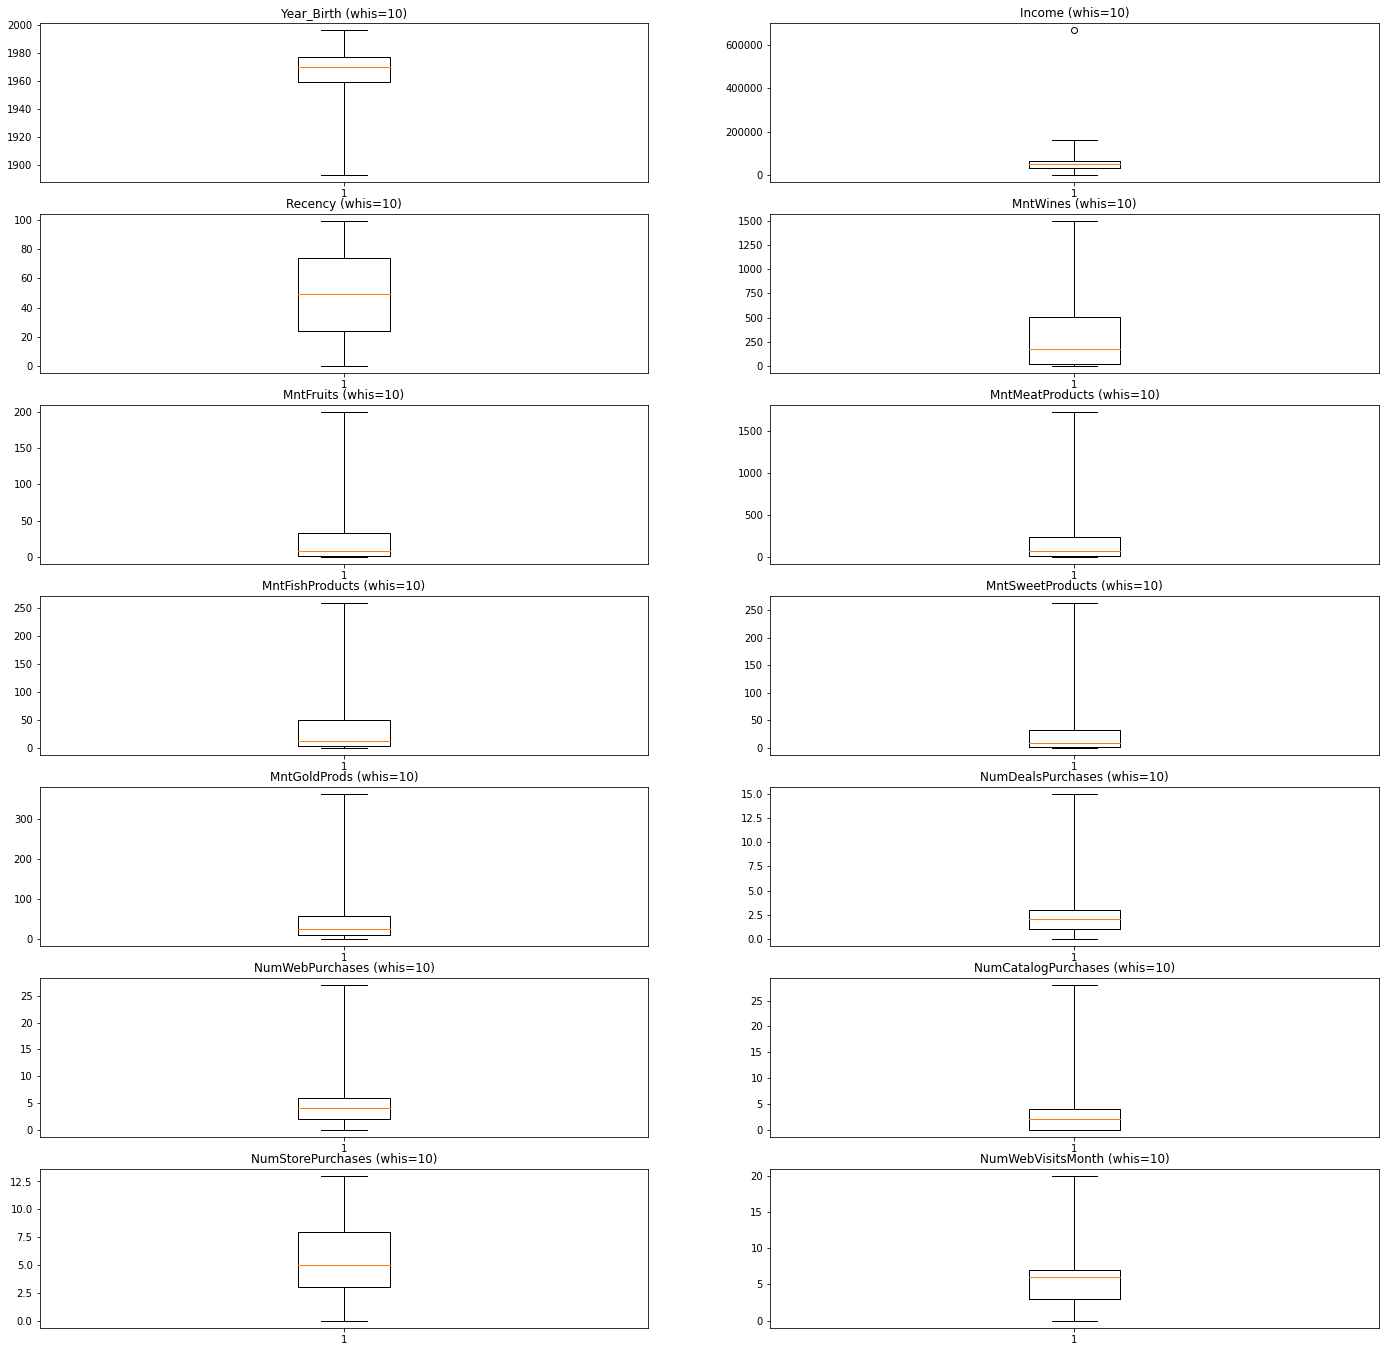

In [13]:
plt.figure(figsize=(24,24))
count = 0
for i in numerical_columns:
  count+=1
  plt.subplot(7,2,count)
  plt.boxplot(train_set[i], whis=10)
  plt.title(f"{i} (whis=10)")

plt.show()

### 2.2 Outlier(Winsorize)

The outlier in the Income column is winsorized.

{'boxes': [<matplotlib.lines.Line2D at 0x7f8b340303d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8b340373d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b3403e410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b34037e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8b34030910>,
  <matplotlib.lines.Line2D at 0x7f8b34030e50>]}

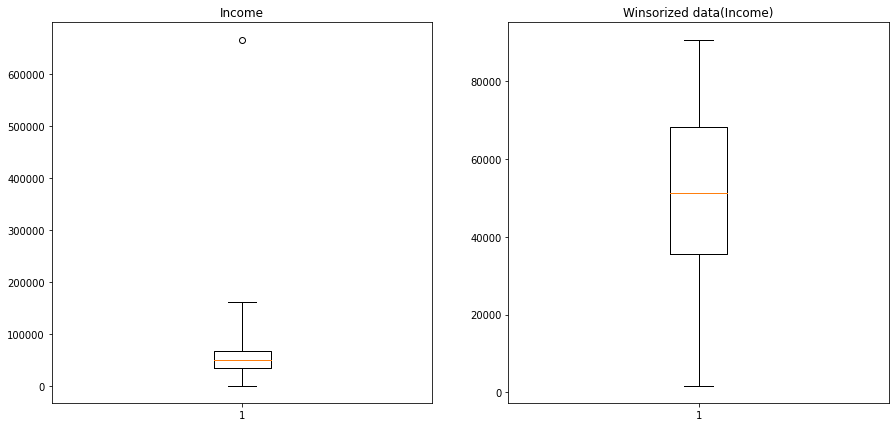

In [14]:
train_set["Income_winsorized"] = winsorize(train_set["Income"], (0, 0.02))

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("Income")
plt.boxplot(train_set["Income"], whis=10)

plt.subplot(1,2,2)
plt.title("Winsorized data(Income)")
plt.boxplot(train_set["Income_winsorized"], whis=10)


# 3.Data Exploration

In [15]:
numerical_columns = ["Year_Birth", "Income_winsorized", "Recency", "MntWines", "MntFruits",
                     "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
                     "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
                     "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

## 3.1 One Variable Analysis

In [16]:
train_set.describe(include="all")

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_winsorized
count,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.805804,NaN,NaN,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,51698.690179
std,11.984069,NaN,NaN,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,20543.921826
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
25%,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35538.750000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000
75%,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68289.750000


### 3.1.1 Continous Variable Visualization

By looking at the histograms drawn for continuous variables;

Columns Year_birth, Income_winsorized, Recency, NumWebVisitsMonth are normally distributed.

Logging will be applied to fit the MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProduts, MntGoldProds columns to the normal distribution.

NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases columns are left untouched as they will be assigned to a single variable in the feature engineering section.

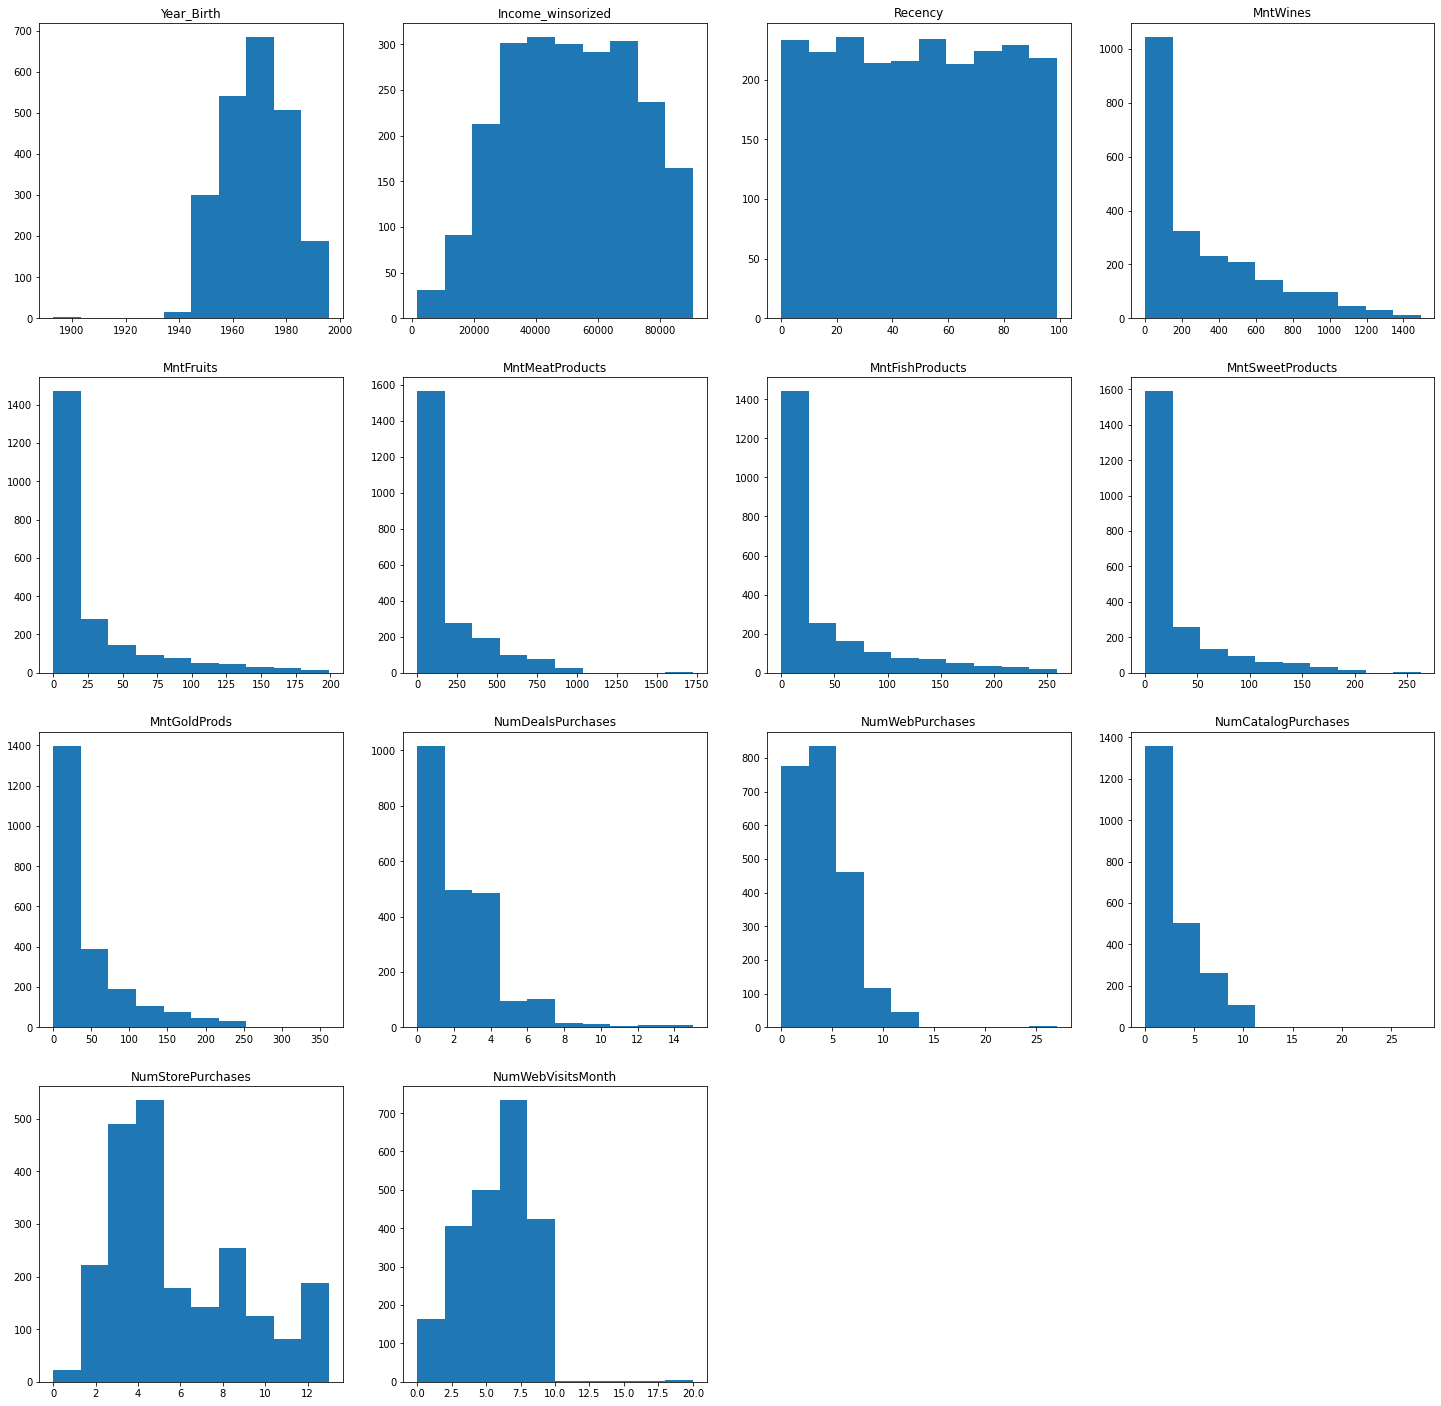

In [18]:
plt.figure(figsize=(25,25))

variables = numerical_columns

for i in range(14):
    plt.subplot(4, 4, i+1)
    plt.hist(train_set[variables[i]])
    plt.title(variables[i])

Since the logarithm operation will give an error in log 0, 1 is used instead of 0 in the columns.

In [19]:
train_set["MntWines"] = train_set["MntWines"].replace(0, 1)
train_set["MntFruits"] = train_set["MntFruits"].replace(0, 1)
train_set["MntMeatProducts"] = train_set["MntMeatProducts"].replace(0, 1)
train_set["MntFishProducts"] = train_set["MntFishProducts"].replace(0, 1)
train_set["MntSweetProducts"] = train_set["MntSweetProducts"].replace(0, 1)
train_set["MntGoldProds"] = train_set["MntGoldProds"].replace(0, 1)

In [20]:
train_set["logaritma_MntWines"] = np.log10(train_set["MntWines"])
train_set["logaritma_MntFruits"] = np.log10(train_set["MntFruits"])
train_set["logaritma_MntMeatProducts"] = np.log10(train_set["MntMeatProducts"])
train_set["logaritma_MntFishProducts"] = np.log10(train_set["MntFishProducts"])
train_set["logaritma_MntSweetProducts"] = np.log10(train_set["MntSweetProducts"])
train_set["logaritma_MntGoldProds"] = np.log10(train_set["MntGoldProds"])

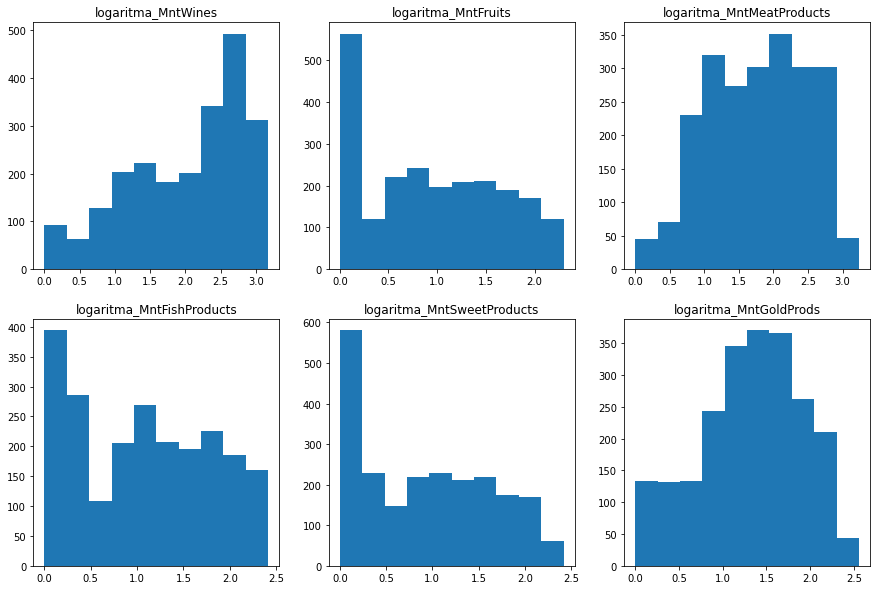

In [21]:
plt.figure(figsize=(15,10))

variables = ["logaritma_MntWines", "logaritma_MntFruits",
               "logaritma_MntMeatProducts", "logaritma_MntFishProducts",
               "logaritma_MntSweetProducts", "logaritma_MntGoldProds"]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(train_set[variables[i]])
    plt.title(variables[i])

### 3.1.2 Categorical Variable Visualization

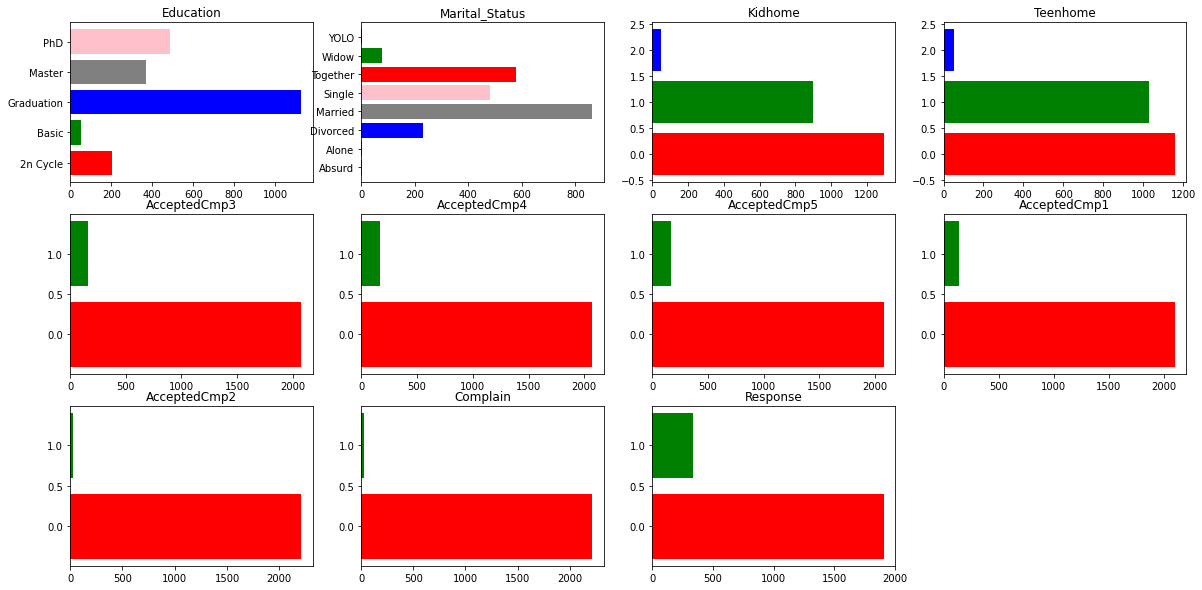

In [22]:
plt.figure(figsize=(20,10))

for i in range(11):
  plt.subplot(3, 4, i+1)
  plt.barh(train_set.groupby(categorical_columns[i])[categorical_columns[i]].count().index, 
      train_set.groupby(categorical_columns[i])[categorical_columns[i]].count(), 
      color=["red","green","blue","grey","pink"])
  plt.title(categorical_columns[i])

## 3.2 Multi Variable Analysis

### 3.2.1 Contiuous Variables

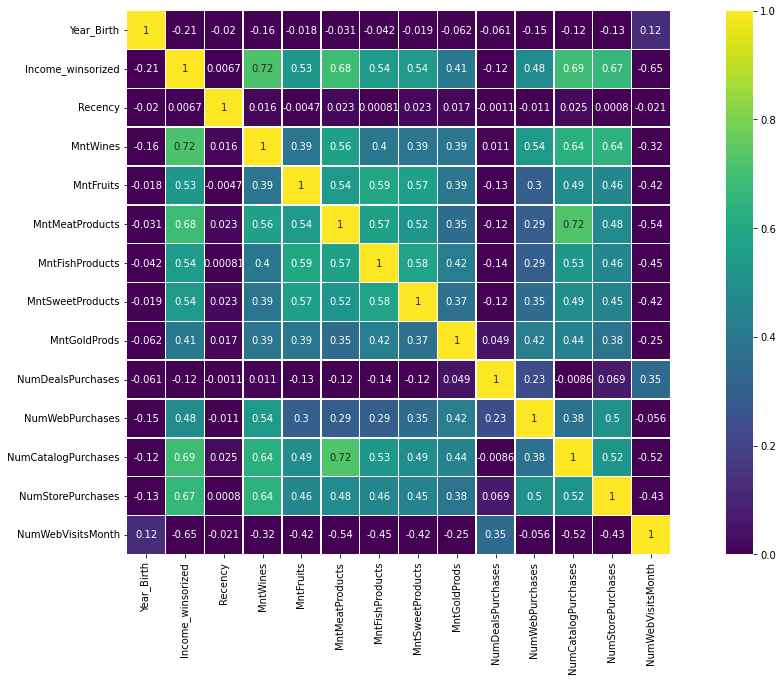

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(train_set[numerical_columns].corr(), square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

### 3.2.2 Continuous-Categorical Variables

Since Income will be used in the regression problem, Income was analyzed with categorical variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

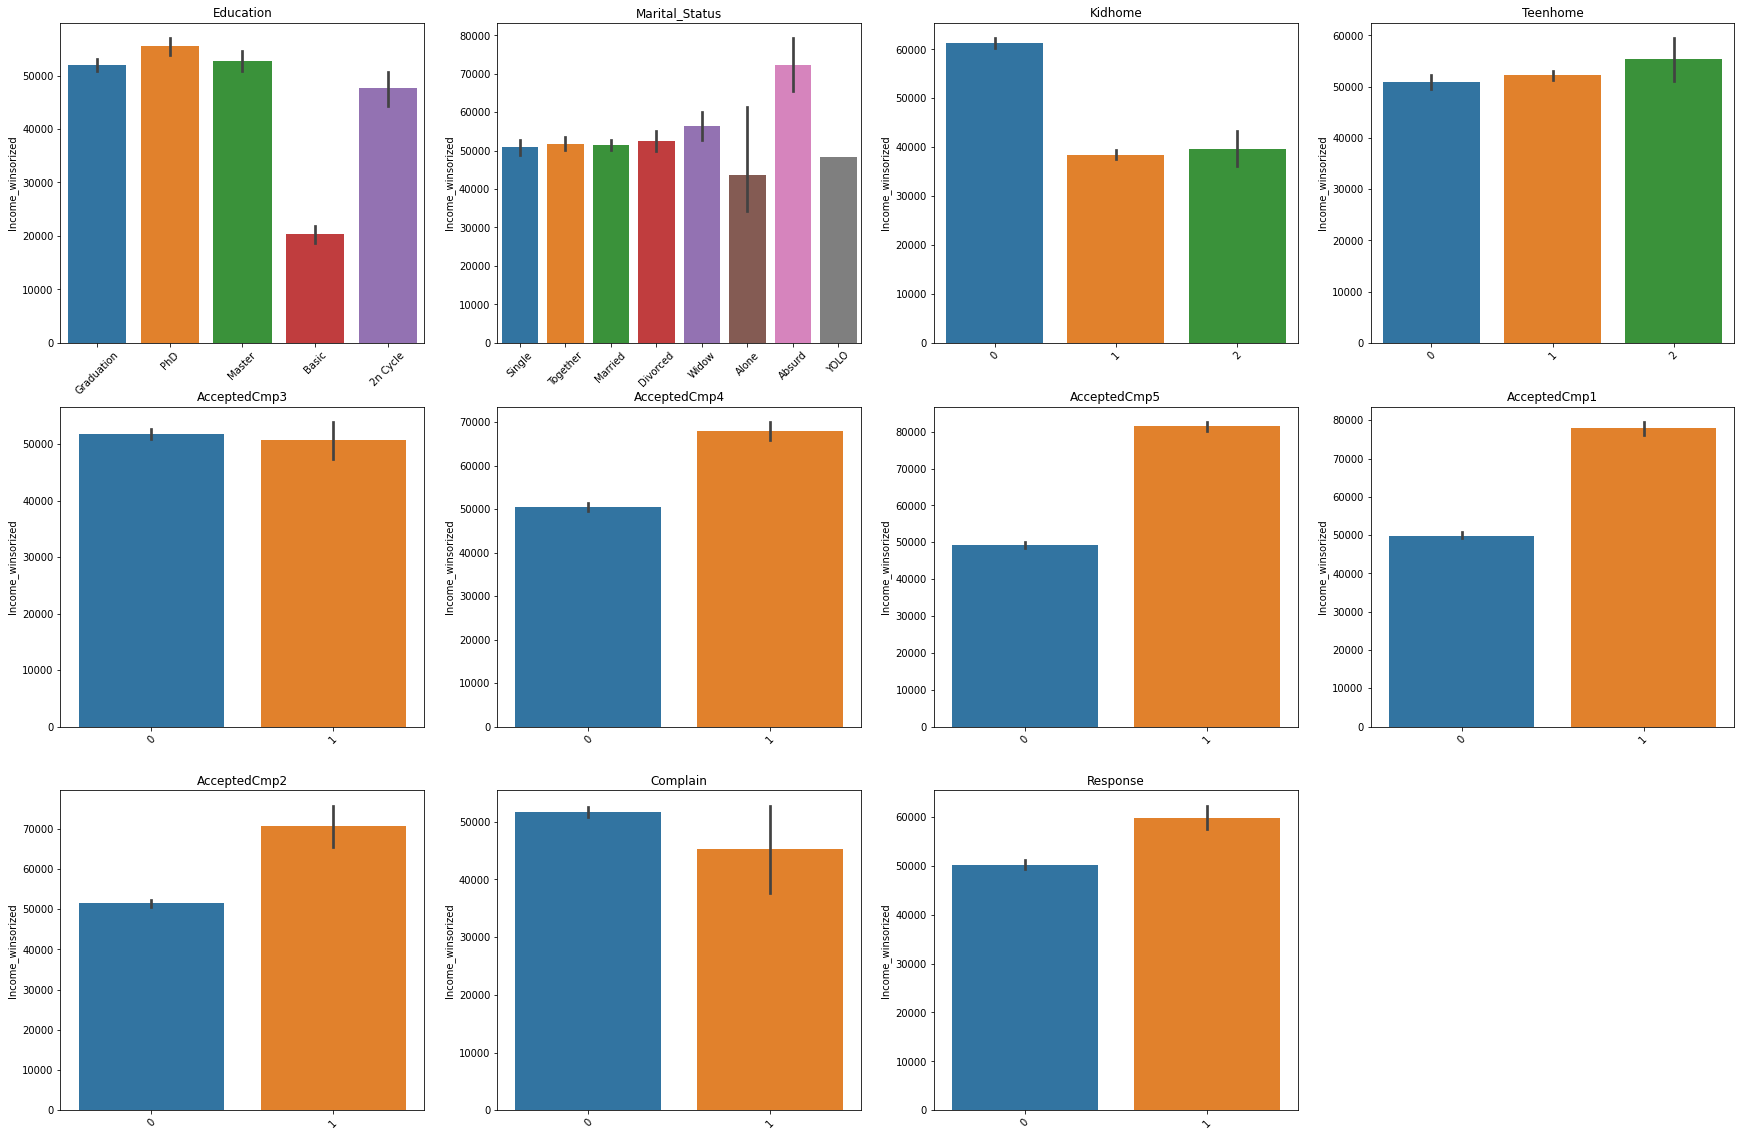

In [24]:
plt.figure(figsize=(30,20))

for i in range(11):
  i = i + 1
  plt.subplot(3,4,i)
  sns.barplot(train_set[categorical_columns[i-1]], train_set["Income_winsorized"]).set(xlabel=None)
  plt.title(f"{categorical_columns[i-1]}")
  plt.xticks(rotation=45)
  

plt.show()

# 4.Feature Engineering

## 4.1 Marital_Status

Marriage status was binarized as in relationship or not.

In [25]:
train_set['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [26]:
train_set['Marital_Status'] = train_set['Marital_Status']\
                              .replace(['Married', 'Together'],'relationship')
train_set['Marital_Status'] = train_set['Marital_Status']\
                              .replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [27]:
train_set['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

## 4.2 Kids + Teen

The number of young people and children in the house were collected in a single column.

In [28]:
train_set['Kids'] = train_set['Kidhome'] + train_set['Teenhome']

## 4.3 Campaigns

The number of accepted campaigns was collected in a single column.

In [29]:
train_set['TotalAcceptedCmp'] = train_set['AcceptedCmp1'] + train_set['AcceptedCmp2'] +\
                                train_set['AcceptedCmp3'] + train_set['AcceptedCmp4'] +\
                                train_set['AcceptedCmp5'] + train_set['Response']

## 4.4 Purchases

Purchases made through different channels are combined in a single column.

In [30]:
train_set['NumTotalPurchases'] = train_set['NumWebPurchases'] + train_set['NumCatalogPurchases'] +\
                                 train_set['NumStorePurchases'] + train_set['NumDealsPurchases']

## 4.5 Age

Year of birth converted to age.

In [31]:
train_set['Age'] = 2015 - train_set["Year_Birth"]

## 4.6 Education

Education levels were binaryized as university graduates or not.

In [32]:
train_set['Education'] = train_set['Education']\
                        .replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
train_set['Education'] = train_set['Education']\
                         .replace(['Basic'], 'UG')

## 4.7 Deleting some column to reduce dimension and complexity of model

In [33]:
col_del = ["Year_Birth", "MntWines","MntFruits", "MntMeatProducts",
           "MntFishProducts", "MntSweetProducts", "MntSweetProducts",
           "MntGoldProds","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3",
           "AcceptedCmp4", "AcceptedCmp5", "Response", "NumWebPurchases",
           "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases",
           "Kidhome", "Teenhome", "Income"]
train_set=train_set.drop(columns=col_del,axis=1)
train_set.head()

,Education,Marital_Status,Recency,NumWebVisitsMonth,Complain,Income_winsorized,logaritma_MntWines,logaritma_MntFruits,logaritma_MntMeatProducts,logaritma_MntFishProducts,logaritma_MntSweetProducts,logaritma_MntGoldProds,Kids,TotalAcceptedCmp,NumTotalPurchases,Age
0,PG,Single,58,7,0,58138.0,2.802774,1.944483,2.737193,2.235528,1.944483,1.944483,0,1,25,58
1,PG,Single,38,5,0,46344.0,1.041393,0.000000,0.778151,0.301030,0.000000,0.778151,2,0,6,61
2,PG,relationship,26,4,0,71613.0,2.629410,1.690196,2.103804,2.045323,1.322219,1.623249,0,0,21,50
3,PG,relationship,26,6,0,26646.0,1.041393,0.602060,1.301030,1.000000,0.477121,0.698970,1,0,8,31
4,PG,relationship,94,5,0,58293.0,2.238046,1.633468,2.071882,1.662758,1.431364,1.176091,1,0,19,34


## 4.8 Converting Categorical Variables

In [34]:
categorical_columns = ["Education", "Marital_Status", "Kids","TotalAcceptedCmp",
                       "Complain"]
features_df = pd.get_dummies(train_set, columns=categorical_columns)

## 4.9 Standard Scaling

In [35]:
numerical_columns = ["Recency", "NumWebVisitsMonth", "Income_winsorized",
                     "logaritma_MntWines", "logaritma_MntFruits",
                     "logaritma_MntMeatProducts", "logaritma_MntFishProducts",
                     "logaritma_MntSweetProducts", "logaritma_MntGoldProds",
                     "NumTotalPurchases", "Age"]
sc = StandardScaler()
for i in range(len(numerical_columns)):
  features_df[numerical_columns[i]] = sc.fit_transform(features_df[[numerical_columns[i]]])

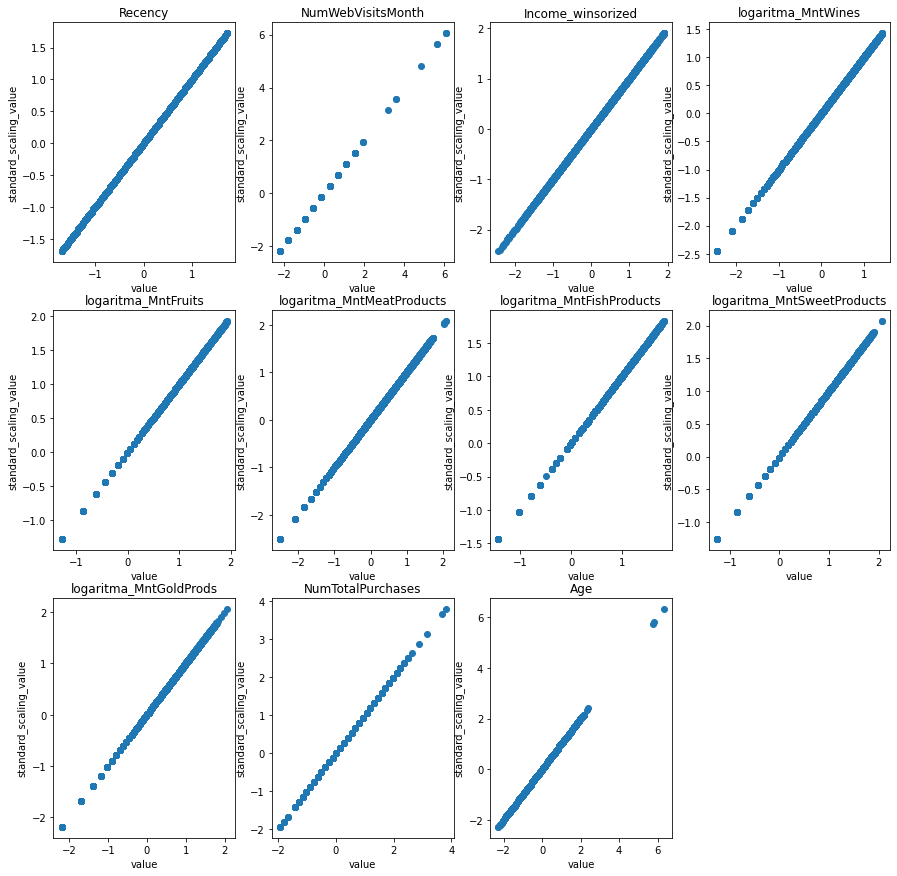

In [36]:
plt.figure(figsize=(15,15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 4, i+1)
    plt.scatter(features_df[numerical_columns[i]], features_df[numerical_columns[i]])
    plt.title(numerical_columns[i])
    plt.xlabel("value")
    plt.ylabel("standard_scaling_value")

## 4.10 Dropping highly correlated columns(Dimension Reduction)

In [37]:
features_df.shape

(2240, 27)

In [38]:
corr_matrix = features_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
features_df =  features_df.drop(to_drop, axis=1)
features_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(2240, 24)

# 5.Regression Problem (Prediction of Income)

## 5.1 Train-Test Split

In [39]:
Y = features_df["Income_winsorized"]
X = features_df.drop("Income_winsorized", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## 5.2 Parameter selection with Grid Search

In [40]:
DTC_Regressor = DecisionTreeRegressor()
DTC_params= {"criterion":["squared_error"], "min_samples_split": [2, 3, 4], "min_samples_leaf": [1, 2, 4], "max_depth": [None, 3, 5]}
DTC_grid_cv = GridSearchCV(DTC_Regressor, param_grid=DTC_params, cv=4)
DTC_grid_cv.fit(X_train, Y_train)
print("Decision Tree")
print("")
print("Best Params : ", DTC_grid_cv.best_params_)
print("Best Scores          : ", DTC_grid_cv.best_score_)

xgb_Regressor = XGBRegressor()
xgb_params= {"min_child_weight": [1, 5, 10], "max_depth": [3,4], "colsample_bytree": [0.6, 1.0], "learning_rate":[0.1, 0.3], "n_jobs": [-1], "objective":['reg:squarederror'], "tree_method":['gpu_hist'], "gpu_id":[0]}
xgb_grid_cv = GridSearchCV(xgb_Regressor, param_grid=xgb_params, cv=4)
xgb_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("XGBOOST")
print("")
print("Best Params : ", xgb_grid_cv.best_params_)
print("Best Scores          : ", xgb_grid_cv.best_score_)

rf_Regressor = RandomForestRegressor()
rf_params= {"n_estimators":[70, 100, 130], "min_samples_leaf": [1, 2, 4], "min_samples_split": [2, 5, 10], "n_jobs": [-1]}
rf_grid_cv = GridSearchCV(rf_Regressor, param_grid=rf_params, cv=4)
rf_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("Random Forest")
print("")
print("Best Params : ", rf_grid_cv.best_params_)
print("Best Scores         : ", rf_grid_cv.best_score_)

KNN_Regressor = KNeighborsRegressor()
KNN_params= {"n_neighbors":[3,4,5,6,7], "n_jobs": [-1], "weights":["uniform", "distance"]}
KNN_grid_cv = GridSearchCV(KNN_Regressor, param_grid=KNN_params, cv=4)
KNN_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("KNN")
print("")
print("Best Params : ", KNN_grid_cv.best_params_)
print("Best Scores         : ", KNN_grid_cv.best_score_)

Decision Tree

Best Params :  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Scores          :  0.7836474817928551


XGBOOST

Best Params :  {'colsample_bytree': 1.0, 'gpu_id': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_jobs': -1, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist'}
Best Scores          :  0.8436554392345449


Random Forest

Best Params :  {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 130, 'n_jobs': -1}
Best Scores         :  0.8411679220707146


KNN

Best Params :  {'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Best Scores         :  0.7952807770310348


Yukarıdaki sonuçlara göre XGBOOST Modeline odaklanıldı.

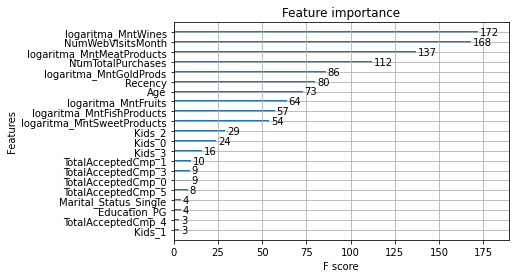

In [41]:
xgb_r = XGBRegressor(tree_method="gpu_hist", learning_rate=0.1, max_depth=4, colsample_bytree=1.0, min_child_weight=5, silent=0, gpu_id=0, objective="reg:squarederror")
xgb_r.fit(X_train, Y_train)
xgb.plot_importance(xgb_r,max_num_features=30)

## 5.3 Training

In [42]:
xgb_r = XGBRegressor(tree_method="gpu_hist", learning_rate=0.1, max_depth=4, colsample_bytree=1.0, min_child_weight=5, silent=0, gpu_id=0, objective="reg:squarederror")
xgb_r.fit(X_train, Y_train)

knn = KNeighborsRegressor(n_neighbors=7, weights="distance")
knn.fit(X_train, Y_train)

dec_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=2, criterion="squared_error")
dec_tree.fit(X_train, Y_train)

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, min_samples_split=2)
rf.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=2)

## 5.4 Model Evaulating

In [43]:
models = []
models.append(('XGBOOST', xgb_r))
models.append(("KNN", knn))
models.append(("Decision Tree", dec_tree))
models.append(("Random Forest", rf))

for i, v in models:

    prediction_train = v.predict(X_train)

    print(f"----------------------------- {i} Model Evaluation -----------------------------")
    print("Training Set CV R-Square value    : {}".format(cross_val_score(v, X_train, Y_train, cv=4).mean()))
    print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(Y_train, prediction_train)))
    print("Mean Square Error (MSE)          : {}".format(mse(Y_train, prediction_train)))
    print("Root Mean Square Error (RMSE)     : {}".format(rmse(Y_train, prediction_train)))
    print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((Y_train - prediction_train) / Y_train)) * 100))

----------------------------- XGBOOST Model Evaluation -----------------------------
Training Set CV R-Square value    : 0.8436554392345449
Mean Absolute Error (MAE)        : 0.21488834138186966
Mean Square Error (MSE)          : 0.07863718198189311
Root Mean Square Error (RMSE)     : 0.28042321940576376
Mean Absolute Percentage Error (MAPE) : 140.9602581705244
----------------------------- KNN Model Evaluation -----------------------------
Training Set CV R-Square value    : 0.7952807770310348
Mean Absolute Error (MAE)        : 0.001467938719135807
Mean Square Error (MSE)          : 0.0006434286059168036
Root Mean Square Error (RMSE)     : 0.025365894542018493
Mean Absolute Percentage Error (MAPE) : 4.840259295546715
----------------------------- Decision Tree Model Evaluation -----------------------------
Training Set CV R-Square value    : 0.7836474817928551
Mean Absolute Error (MAE)        : 0.31509371193333596
Mean Square Error (MSE)          : 0.1706809451556173
Root Mean Square 

## 5.5 Model Test Accuracy

In [44]:
models = []
models.append(('XGBOOST', xgb_r))
models.append(("KNN", knn))
models.append(("Decision Tree", dec_tree))
models.append(("Random Forest", rf))

for i, v in models:

    prediction_test = v.predict(X_test)

    print(f"----------------------------- {i} Model Test Results -----------------------------")
    print("Test Set CV R-Square value         : {}".format(v.score(X_test, Y_test)))
    print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(Y_test, prediction_test)))
    print("Mean Square Error (MSE)          : {}".format(mse(Y_test, prediction_test)))
    print("Root Mean Square Error (RMSE)     : {}".format(rmse(Y_test, prediction_test)))
    print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((Y_test - prediction_test) / Y_test)) * 100))

----------------------------- XGBOOST Model Test Results -----------------------------
Test Set CV R-Square value         : 0.8588412113038046
Mean Absolute Error (MAE)        : 0.28346881058592477
Mean Square Error (MSE)          : 0.13695619786708083
Root Mean Square Error (RMSE)     : 0.37007593527150723
Mean Absolute Percentage Error (MAPE) : 127.12289503323962
----------------------------- KNN Model Test Results -----------------------------
Test Set CV R-Square value         : 0.8070462468716155
Mean Absolute Error (MAE)        : 0.3188954109427866
Mean Square Error (MSE)          : 0.18720911844548277
Root Mean Square Error (RMSE)     : 0.43267669043465096
Mean Absolute Percentage Error (MAPE) : 116.99310814349786
----------------------------- Decision Tree Model Test Results -----------------------------
Test Set CV R-Square value         : 0.7899965427691007
Mean Absolute Error (MAE)        : 0.3401103252351178
Mean Square Error (MSE)          : 0.20375121738389715
Root Mean S

According to the above results, xgboost or random forest can be selected.

# 6.Classification Problem(Prediction of Education Level)

In [45]:
features_df["Education_PG"].value_counts()

1    2186
0      54
Name: Education_PG, dtype: int64

## 6.1 Imbalanced Data

Imbalanced distributed data was eliminated by creating synthetic data using the smote method.

In [46]:
Y = features_df["Education_PG"]
X = features_df.drop("Education_PG", axis=1)

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = sm.fit_resample(X, Y)

In [48]:
y_smote.value_counts()

1    2186
0    2186
Name: Education_PG, dtype: int64

## 6.2 Model Training

### 6.2.1 Train test split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=42)

### 6.2.2 Parameter selection with Grid Search

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

DTC_Classifier = DecisionTreeClassifier()
DTC_params= {"criterion":["entropy"], "min_samples_split": [2, 3, 4], "min_samples_leaf": [1, 2, 4]}
DTC_grid_cv = GridSearchCV(DTC_Classifier, param_grid=DTC_params, cv=4)
DTC_grid_cv.fit(X_train, Y_train)
print("Decision Tree")
print("")
print("Best Params : ", DTC_grid_cv.best_params_)
print("Best Score         : ", DTC_grid_cv.best_score_)

xgb_Classifier = XGBClassifier()
xgb_params= {"min_child_weight": [1, 5, 10], "max_depth": [3,4], "colsample_bytree": [0.6, 1.0], "learning_rate":[0.1, 0.3], "n_jobs": [-1]}
xgb_grid_cv = GridSearchCV(xgb_Classifier, param_grid=xgb_params, cv=4)
xgb_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("XGBOOST")
print("")
print("Best Params : ", xgb_grid_cv.best_params_)
print("Best Score         : ", xgb_grid_cv.best_score_)

rf_Classifier = RandomForestClassifier()
rf_params= {"n_estimators":[90, 100, 110], "min_samples_leaf": [1, 2, 4], "min_samples_split": [2, 5, 10], "n_jobs": [-1]}
rf_grid_cv = GridSearchCV(rf_Classifier, param_grid=rf_params, cv=4)
rf_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("Random Forest")
print("")
print("Best Params : ", rf_grid_cv.best_params_)
print("Best Score         : ", rf_grid_cv.best_score_)

KNN_Classifier = KNeighborsClassifier()
KNN_params= {"n_neighbors":[3,4,5,6,7], "n_jobs": [-1]}
KNN_grid_cv = GridSearchCV(KNN_Classifier, param_grid=KNN_params, cv=4)
KNN_grid_cv.fit(X_train, Y_train)
print("")
print("")
print("KNN")
print("")
print("Best Params : ", KNN_grid_cv.best_params_)
print("Best Score         : ", KNN_grid_cv.best_score_)

Decision Tree

Best Params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score         :  0.98597077042199


XGBOOST

Best Params :  {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_jobs': -1}
Best Score         :  0.9878011554840823


Random Forest

Best Params :  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
Best Score         :  0.989021039935674


KNN

Best Params :  {'n_jobs': -1, 'n_neighbors': 3}
Best Score         :  0.9792627088358796


### 6.2.3 Training

In [51]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

DTC_Classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, min_samples_split=2)
DTC_Classifier.fit(X_train, Y_train)

xgb = XGBClassifier(colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_jobs=-1)
xgb.fit(X_train, Y_train)

rf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1)
rf.fit(X_train,Y_train)

KNN_Classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
KNN_Classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

## 6.3 Model Evaluating

In [52]:
from sklearn import metrics


models = []
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XGBOOST', xgb))
models.append(('Random Forest', rf))
models.append(('KNN_Classifier', KNN_Classifier))


for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=4)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))

    print(f"----------------------------- {i} Model Evaluation -----------------------------")
    print(f"\nCross Validation Mean Score:\n {scores.mean()}\n")
    print(f"\n Model Accuracy:\n {accuracy}\n")
    print(f"\n Classification report:\n\n {classification}") 

----------------------------- Naive Bayes Classifier Model Evaluation -----------------------------

Cross Validation Mean Score:
 0.8649003097173829


 Model Accuracy:
 0.8706922842329978


 Classification report:

               precision    recall  f1-score   support

           0       0.81      0.98      0.88      1663
           1       0.97      0.76      0.85      1616

    accuracy                           0.87      3279
   macro avg       0.89      0.87      0.87      3279
weighted avg       0.89      0.87      0.87      3279

----------------------------- Decision Tree Classifier Model Evaluation -----------------------------

Cross Validation Mean Score:
 0.9829216176777152


 Model Accuracy:
 0.9978652028057334


 Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00      1616

    accuracy                           1.00      3279
   macro avg       

## 6.4 Model Test Accuracy

In [53]:
def confusionMatrix(i, cm):
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title(f'{i} Confusion Matrix')

----------------------------- Naive Bayes Classifier Model Test Results -----------------------------

 Model Accuracy:
 0.8645928636779506


 Classification report:

               precision    recall  f1-score   support

           0       0.79      0.98      0.87       523
           1       0.97      0.76      0.85       570

    accuracy                           0.86      1093
   macro avg       0.88      0.87      0.86      1093
weighted avg       0.88      0.86      0.86      1093

----------------------------- Decision Tree Classifier Model Test Results -----------------------------

 Model Accuracy:
 0.9807868252516011


 Classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       523
           1       0.99      0.97      0.98       570

    accuracy                           0.98      1093
   macro avg       0.98      0.98      0.98      1093
weighted avg       0.98      0.98      0.98      1093

--------

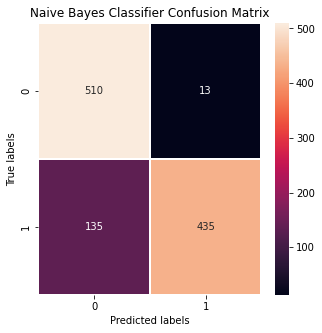

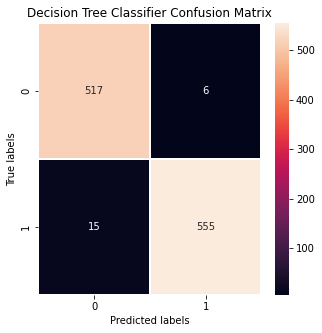

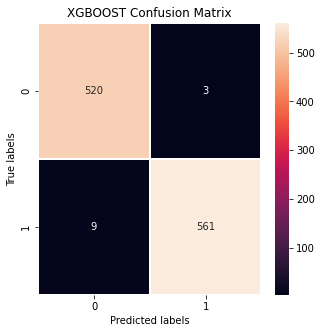

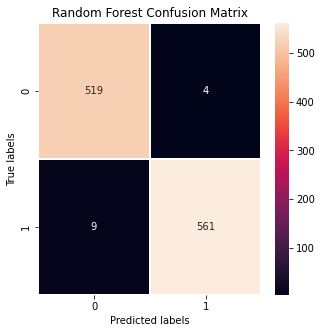

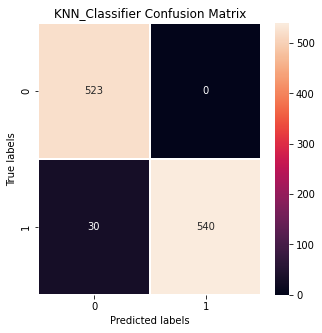

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 


models = []
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XGBOOST', xgb))
models.append(('Random Forest', rf))
models.append(('KNN_Classifier', KNN_Classifier))


for i, v in models:
    
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    
    print(f"----------------------------- {i} Model Test Results -----------------------------")
    print(f"\n Model Accuracy:\n {accuracy}\n")
    print(f"\n Classification report:\n\n {classification}")
    confusionMatrix(i, confusion_matrix)

According to the above results, xgboost or random forest can be selected.

# 7.Clustering Problem 

## 7.1 Elbow Method

In [55]:
from sklearn.cluster import KMeans

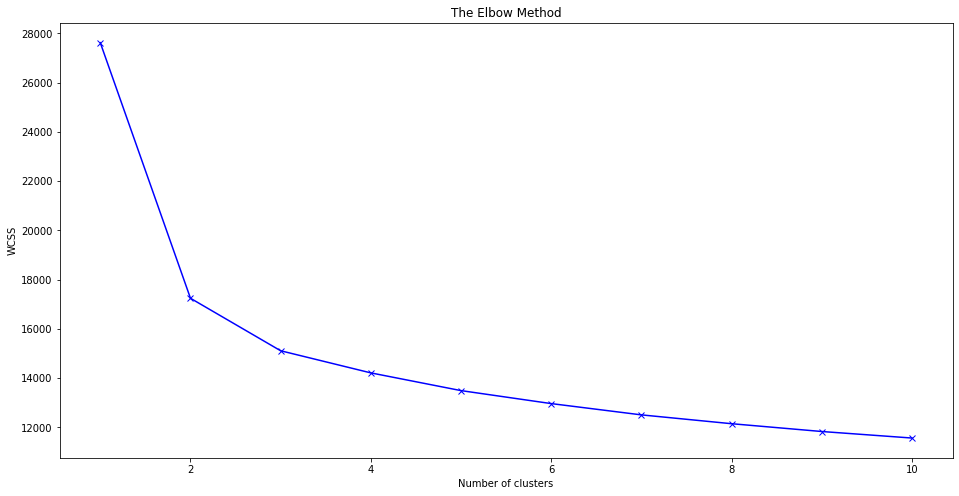

In [56]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Let's also look at the silhouette score to determine the number of clusters.

## 7.2 Silhouette Score

In [57]:
from sklearn.metrics import silhouette_score 

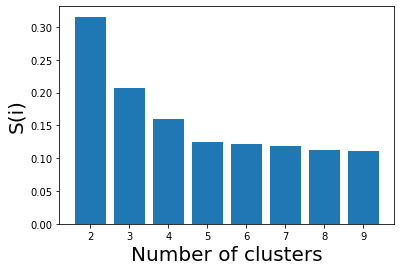

In [58]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(features_df)
    silhouette_scores.append(silhouette_score(features_df, c)) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

Cluster number 2 was chosen according to both elbow method and silhouette score.

## 7.3 Model building

In [59]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(features_df)
pred=kmeans.predict(features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

features_df['cluster'] = pred + 1 # preprocessed data
train_set['cluster'] = pred + 1 # old data
for_product_clustering['cluster'] = pred + 1 # For product clustering

In [60]:
features_df["cluster"].value_counts()

1    1128
2    1112
Name: cluster, dtype: int64

## 7.4 Cluster Interpretation

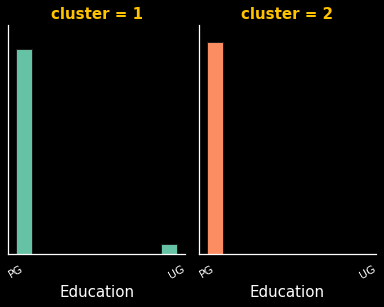

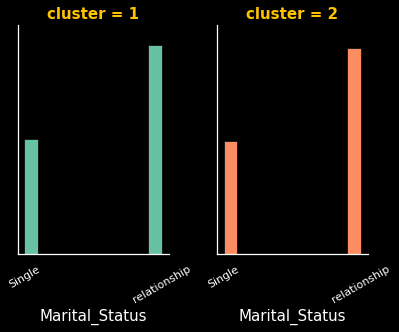

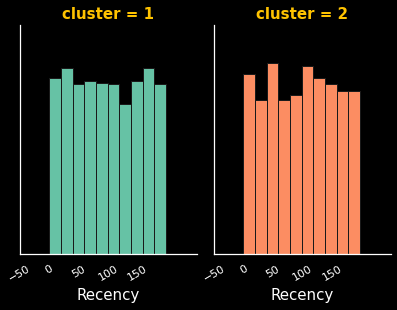

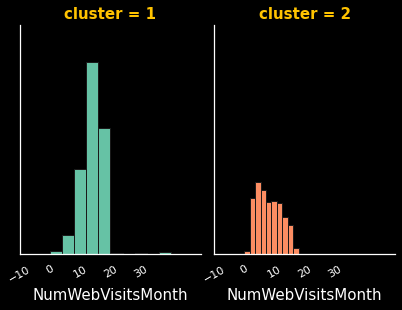

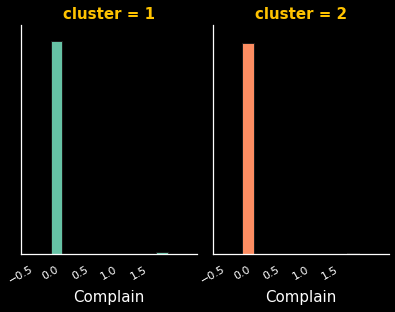

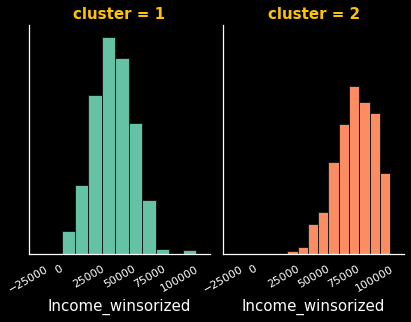

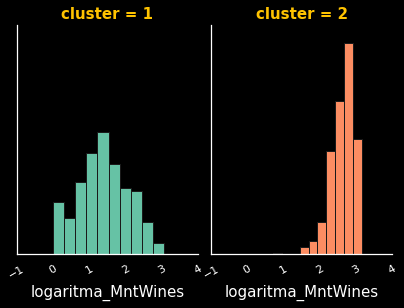

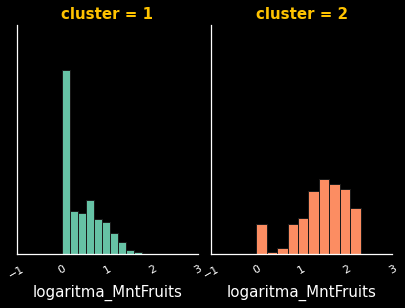

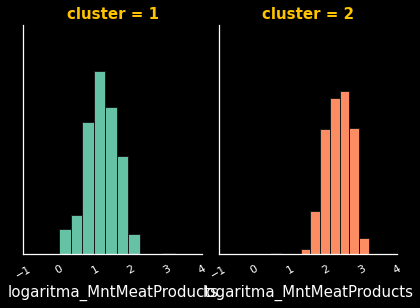

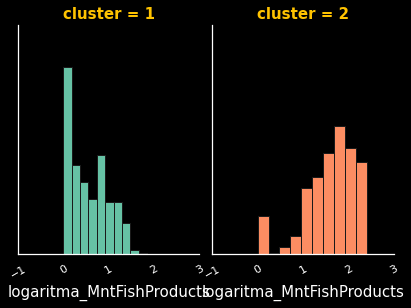

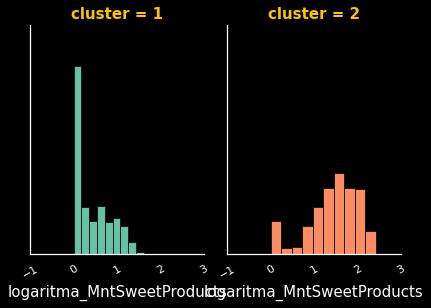

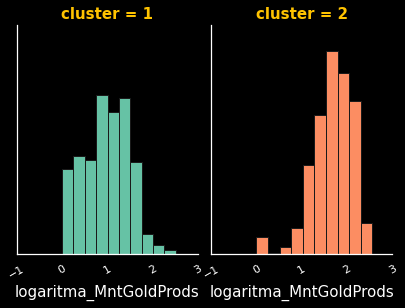

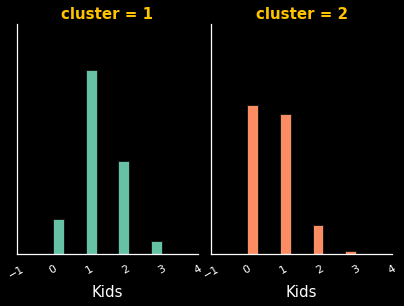

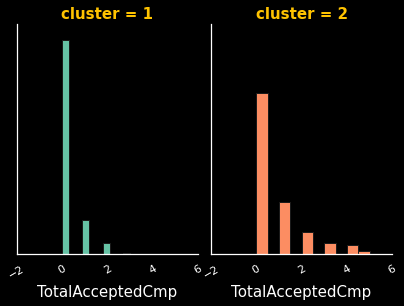

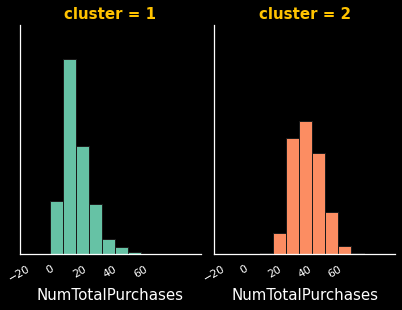

In [61]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'DejaVu Sans'})

for i in train_set:
    if (i=="Age") or (i=="cluster"):
      continue
    g = sns.FacetGrid(train_set, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

Cluster 1 has more visits to the store's website. The number of children is more.

Cluster 2 has a higher income level. He spends more money on alcohol. More money is spent on fruit. More money is spent on meat. Cluster 2 spent more on all food expenditures. Cluster 2 has more purchases count.

Based on the comments above, the Cluster 2 situation is reserved for people with better luxury spending amounts. Cluster 1 is divided into economical and cheap spenders.

## 7.5 Products Distribution by Clusters 

In [62]:
import plotly.express as px
clusters_products1 = for_product_clustering.groupby(['cluster'])
clusters_products2 = clusters_products1.agg({'MntWines':'sum', 'MntFruits':'sum', 'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum'})

clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1':'Products'})   # Oposite as pivoting

clusters_products3['group'] = clusters_products3['cluster']
clusters_products3['group'] = clusters_products3['group'].astype(str)

# Rename values

clusters_products3['group'] = clusters_products3['group'].str.replace('1', 'Economical and Cheap Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('2', 'Good and Elite Customers')

products = clusters_products3.copy()
products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# Visualization
fig = px.bar(products, x='group', y='ratio', color='Products',
             labels={
                     "ratio": "Ratio",
                     "group": "Consumer's type"
                     },
             color_discrete_map={
                     'Gold': '#FFD700',
                     'Fish': '#87CEEB',
                     'Wines': '#b11226',
                     'Meat': '#f08080',
                     'Sweet': '#FF69B4',
                     'Fruits': 'lightgreen'},
                title="Products Distribution by Clusters")

fig.layout.yaxis.tickformat = ',.0%'

fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(
    {'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
    },
    font=dict(
        family="verdana",
        size=21,
        color="white"
    ),
    width=680,
    height=800,
    title_font_color="#FFC300",
    yaxis_title=None,
    xaxis_title=None
)

fig.show()

It has been observed that good and elite customers spend more of their money on meat, fish, fruit and confectionery than other customer groups.

It has been observed that economical and cheap customers also spend their money on gold and alcohol at a higher rate than other customer groups.